In [72]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [ ]:
churn_data = pd.read_csv("/content/customer_churn .csv")

In [ ]:
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df = pd.DataFrame(churn_data)

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn_data.drop("customerID", axis =1, inplace=True)

In [ ]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn_data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [73]:
# pd.to_numeric(churn_data['TotalCharges'])

In [ ]:
churn_data[churn_data["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
churn_data[churn_data["TotalCharges"]==" "].shape

(11, 20)

In [ ]:
churn_data.shape

(7043, 20)

In [ ]:

churn_data['TotalCharges'] = churn_data['TotalCharges'].replace(" ", 0)

In [ ]:
churn_data[churn_data["TotalCharges"]==" "].shape

(0, 20)

In [ ]:
pd.to_numeric(churn_data['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
#
# churn_data1 = churn_data[churn_data["TotalCharges"]!=" "]

In [ ]:
churn_data['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
churn_data.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
type(churn_data["TotalCharges"]), type(churn_data.TotalCharges)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
churn_data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
churn_data.TotalCharges = pd.to_numeric(churn_data['TotalCharges'])

In [ ]:
churn_data.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
churn_data.Churn.values

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [ ]:
churn_data[churn_data.Churn == "Yes"].shape

(1869, 20)

In [ ]:
churn_data[churn_data.Churn == "No"].shape

(5174, 20)

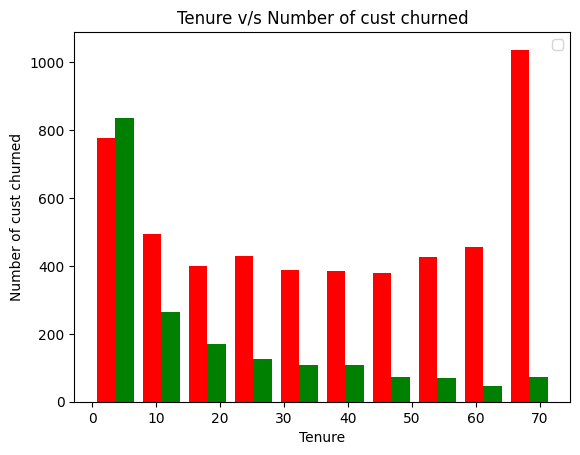

In [ ]:
import matplotlib.pyplot as plt
tenure_churn_no = churn_data[churn_data.Churn=="No"].tenure
tenure_churn_yes = churn_data[churn_data.Churn=="Yes"].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of cust churned")
plt.title("Tenure v/s Number of cust churned")

plt.hist([tenure_churn_no, tenure_churn_yes], color=["red","green"])
plt.legend()

In [ ]:
MonthlyCharges = churn_data['MonthlyCharges'].value_counts()

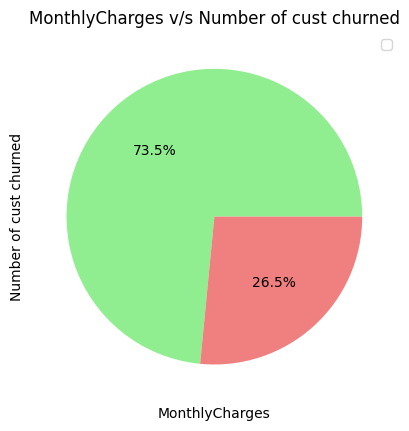

In [ ]:
churn_counts = churn_data['Churn'].value_counts()
plt.xlabel("MonthlyCharges")
plt.ylabel("Number of cust churned")
plt.title("MonthlyCharges v/s Number of cust churned")

plt.pie(churn_counts, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.legend()

In [ ]:
def col_unique_value(d):
    for col in d:
        print(col,":", d[col].unique())

In [ ]:
col_unique_value(churn_data)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [ ]:
churn_data.replace('No phone service','No', inplace=True)
churn_data.replace('No internet service','No', inplace=True)

In [ ]:
col_unique_value(churn_data)

In [ ]:
# churn_data['Churn'] = label_encoder.fit_transform(churn_data['Churn'])
# churn_data['Partner'] = label_encoder.fit_transform(churn_data['Partner'])
# churn_data['PhoneService'] = label_encoder.fit_transform(churn_data['PhoneService'])
# churn_data['OnlineSecurity'] = label_encoder.fit_transform(churn_data['OnlineSecurity'])
# churn_data['DeviceProtection'] = label_encoder.fit_transform(churn_data['DeviceProtection'])
# churn_data['Dependents'] = label_encoder.fit_transform(churn_data['Dependents'])
# churn_data['MultipleLines'] = label_encoder.fit_transform(churn_data['MultipleLines'])
# churn_data['OnlineBackup'] = label_encoder.fit_transform(churn_data['OnlineBackup'])
# churn_data['TechSupport'] = label_encoder.fit_transform(churn_data['TechSupport'])
# churn_data['StreamingTV'] = label_encoder.fit_transform(churn_data['StreamingTV'])
# churn_data['StreamingMovies'] = label_encoder.fit_transform(churn_data['StreamingMovies'])
# churn_data['PaperlessBilling'] = label_encoder.fit_transform(churn_data['PaperlessBilling'])
# churn_data['PaymentMethod'] = label_encoder.fit_transform(churn_data['PaymentMethod'])
# churn_data['Contract'] = label_encoder.fit_transform(churn_data['Contract'])
# churn_data['InternetService'] = label_encoder.fit_transform(churn_data['InternetService'])
# churn_data

In [ ]:
yes_no_col = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity' ,'OnlineBackup','DeviceProtection',
              'TechSupport' ,'StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in yes_no_col:
    churn_data[i].replace({"Yes":1,"No":0},inplace=True)

In [ ]:
col_unique_value(churn_data)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
label_encoder = LabelEncoder()
churn_data['gender'] = label_encoder.fit_transform(churn_data['gender'])

In [ ]:
col_unique_value(churn_data)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
churn_data_pro = pd.get_dummies(data = churn_data, columns = ["PaymentMethod","Contract","InternetService"])

In [ ]:
churn_data_pro

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,0,0,0,1,0,1,0,1,0,0
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
7040,0,0,1,1,11,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [ ]:
col_unique_value(churn_data_pro)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]


In [ ]:
col_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = MinMaxScaler()
churn_data_pro[col_to_scale] = scaler.fit_transform(churn_data_pro[col_to_scale])

In [ ]:
col_unique_value(churn_data_pro)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tec

In [ ]:
X = churn_data_pro.drop("Churn", axis = "columns")
y = churn_data_pro["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_train.shape, y_train.shape , X_test.shape , y_test.shape

((5634, 26), (5634,), (1409, 26), (1409,))

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape=(26,),activation="relu")])

model.compile(
    optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
177/177 [==============================] - 4s 7ms/step - loss: 5.6535 - accuracy: 0.3624
Epoch 2/5
177/177 [==============================] - 1s 7ms/step - loss: 1.7796 - accuracy: 0.5804
Epoch 3/5
177/177 [==============================] - 1s 6ms/step - loss: 1.4178 - accuracy: 0.6273
Epoch 4/5
177/177 [==============================] - 1s 5ms/step - loss: 1.2776 - accuracy: 0.6340
Epoch 5/5
177/177 [==============================] - 1s 5ms/step - loss: 1.1068 - accuracy: 0.6715


In [ ]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.9605 - accuracy: 0.6884


[0.9605453610420227, 0.6884315013885498]

In [ ]:
y_test_pre=model.predict(X_test)

45/45 [==============================] - 0s 3ms/step


In [ ]:
y_predicted=[]
for i in y_test_pre:
  if i<0.5:
    y_predicted.append(0)
  else:
    y_predicted.append(1)

In [74]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[888, 148],
       [315,  58]])

In [75]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79      1036
           1       0.28      0.16      0.20       373

    accuracy                           0.67      1409
   macro avg       0.51      0.51      0.50      1409
weighted avg       0.62      0.67      0.64      1409



In [ ]:
con_mat=tf.math.confusion_matrix(y_test,y_predicted)

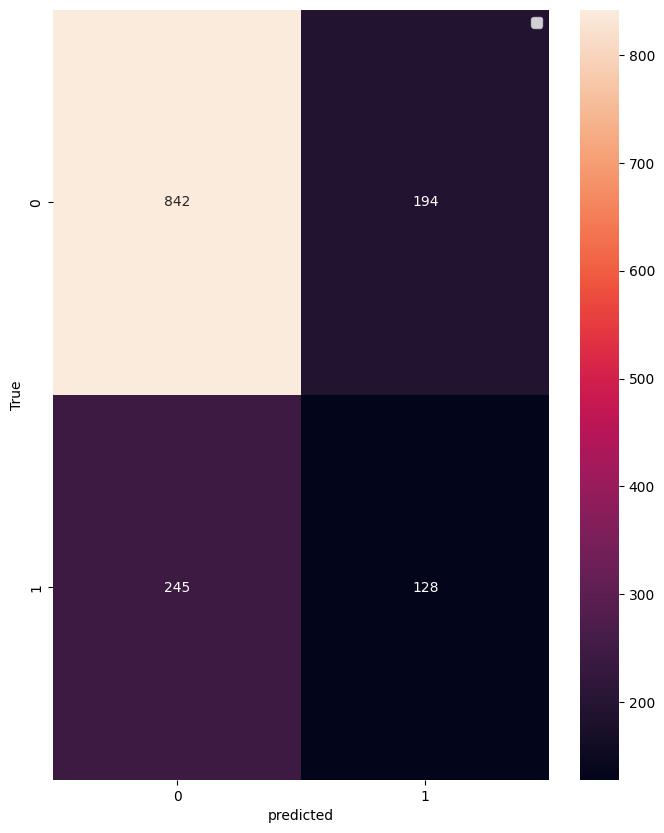

In [ ]:
plt.figure(figsize=(8,10))
sns.heatmap(con_mat,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("True")
plt.legend()

In [ ]:
model_glorot= keras.Sequential([
    keras.layers.Dense(1,input_shape = (26,),activation="relu",
                       kernel_initializer = keras.initializers.GlorotNormal())
    ])
model_glorot.compile(optimizer="adam",
              loss = "binary_crossentropy",
              metrics =[ "accuracy"])

model_glorot.fit(X_train, y_train, epochs=2, batch_size=500)

Epoch 1/2
12/12 [==============================] - 1s 4ms/step - loss: 2.5266 - accuracy: 0.7254
Epoch 2/2
12/12 [==============================] - 0s 3ms/step - loss: 2.4653 - accuracy: 0.7245


In [ ]:
model_glorot_gl= keras.Sequential([
    keras.layers.Dense(1,input_shape = (26,),activation="relu",
                       kernel_initializer = keras.initializers.GlorotUniform())
    ])
model_glorot_gl.compile(optimizer="adam",
              loss = "binary_crossentropy",
              metrics =[ "accuracy"])

model_glorot.fit(X_train, y_train, epochs=2, batch_size=500)

Epoch 1/2
12/12 [==============================] - 0s 2ms/step - loss: 2.4018 - accuracy: 0.7238
Epoch 2/2
12/12 [==============================] - 0s 2ms/step - loss: 2.3648 - accuracy: 0.7224


In [ ]:
model_glorot_gli= keras.Sequential([
    keras.layers.Dense(1,input_shape = (26,),activation="relu",
                       kernel_initializer = keras.initializers.HeNormal())
    ])
model_glorot_gli.compile(optimizer="adam",
              loss = "binary_crossentropy",
              metrics =[ "accuracy"])

model_glorot.fit(X_train, y_train, epochs=2, batch_size=500)

Epoch 1/2
12/12 [==============================] - 0s 8ms/step - loss: 2.2393 - accuracy: 0.7315
Epoch 2/2
12/12 [==============================] - 0s 5ms/step - loss: 2.2375 - accuracy: 0.7334


In [ ]:
model_glorot_glit= keras.Sequential([
    keras.layers.Dense(1,input_shape = (26,),activation="relu",
                       kernel_initializer = keras.initializers.zeros())
    ])
model_glorot_glit.compile(optimizer="adam",
              loss = "binary_crossentropy",
              metrics =[ "accuracy"])

model_glorot.fit(X_train, y_train, epochs=5, batch_size=500)

Epoch 1/5
12/12 [==============================] - 0s 4ms/step - loss: 2.2259 - accuracy: 0.7346
Epoch 2/5
12/12 [==============================] - 0s 3ms/step - loss: 2.2059 - accuracy: 0.7345
Epoch 3/5
12/12 [==============================] - 0s 3ms/step - loss: 2.1888 - accuracy: 0.7339
Epoch 4/5
12/12 [==============================] - 0s 3ms/step - loss: 2.1589 - accuracy: 0.7334
Epoch 5/5
12/12 [==============================] - 0s 3ms/step - loss: 2.1388 - accuracy: 0.7323


In [ ]:
model_glorot_glit= keras.Sequential([
    keras.layers.Dense(1,input_shape = (26,),activation="relu"),
                       keras.layers.Dropout(0.2),
                       keras.layers.Dense(1,activation="sigmoid")])
model_glorot_glit.compile(optimizer="adam",
              loss = "binary_crossentropy",
              metrics =[ "accuracy"])

model_glorot.fit(X_train, y_train, epochs=5,)

Epoch 1/5
177/177 [==============================] - 0s 2ms/step - loss: 1.6332 - accuracy: 0.7513
Epoch 2/5
177/177 [==============================] - 0s 2ms/step - loss: 1.5653 - accuracy: 0.7513
Epoch 3/5
177/177 [==============================] - 0s 2ms/step - loss: 1.5081 - accuracy: 0.7488
Epoch 4/5
177/177 [==============================] - 0s 2ms/step - loss: 1.4389 - accuracy: 0.7458
Epoch 5/5
177/177 [==============================] - 0s 2ms/step - loss: 1.3419 - accuracy: 0.7370


In [78]:
model_nor= keras.Sequential([
    keras.layers.Dense(100, input_shape=(26,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,input_shape = (26,),activation="sigmoid",),
    ])
model_nor.compile(optimizer="adam",
              loss = "binary_crossentropy",
              metrics =[ "accuracy"])

model_glorot.fit(X_train, y_train, epochs=100)

Epoch 1/100
177/177 [==============================] - 1s 3ms/step - loss: 2.5316 - accuracy: 0.5793
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 1.9321 - accuracy: 0.6450
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 1.7289 - accuracy: 0.6638
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 1.6282 - accuracy: 0.6787
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 1.5708 - accuracy: 0.6938
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 1.4738 - accuracy: 0.6976
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 1.3918 - accuracy: 0.7031
Epoch 8/100
177/177 [==============================] - 0s 2ms/step - loss: 1.2805 - accuracy: 0.6828
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: 1.1854 - accuracy: 0.7013
Epoch 10/100
177/177 [==============================] - 0s 2ms/step - loss: 1.1632 - accura

In [79]:
model_nor2= keras.Sequential([
    keras.layers.Dense(100, input_shape=(26,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1,input_shape = (26,),activation="sigmoid",),
    ])
model_nor2.compile(optimizer="adam",
              loss = "binary_crossentropy",
              metrics =[ "accuracy"])

model_nor2.fit(X_train, y_train, epochs=5)

Epoch 1/5
177/177 [==============================] - 3s 5ms/step - loss: 0.4874 - accuracy: 0.7508
Epoch 2/5
177/177 [==============================] - 1s 5ms/step - loss: 0.4514 - accuracy: 0.7796
Epoch 3/5
177/177 [==============================] - 1s 5ms/step - loss: 0.4500 - accuracy: 0.7765
Epoch 4/5
177/177 [==============================] - 1s 5ms/step - loss: 0.4352 - accuracy: 0.7994
Epoch 5/5
177/177 [==============================] - 1s 3ms/step - loss: 0.4312 - accuracy: 0.7941


In [80]:
model_nor3= keras.Sequential([
    keras.layers.Dense(100, input_shape=(26,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1,input_shape = (26,),activation="sigmoid",),
    ])
model_nor3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss = "binary_crossentropy",
              metrics =[ "accuracy"])

model_nor3.fit(X_train, y_train, epochs=5)

Epoch 1/5
177/177 [==============================] - 4s 5ms/step - loss: 0.4737 - accuracy: 0.7659
Epoch 2/5
177/177 [==============================] - 1s 3ms/step - loss: 0.4398 - accuracy: 0.7890
Epoch 3/5
177/177 [==============================] - 1s 3ms/step - loss: 0.4372 - accuracy: 0.7890
Epoch 4/5
177/177 [==============================] - 1s 3ms/step - loss: 0.4307 - accuracy: 0.7971
Epoch 5/5
177/177 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.7962
